<!--# STAT 207: Data Science Exploration-->
## Sampling and Probability

In this section, we explore random sampling from the data, both with and without replacement. It is natural at this point to begin introducing ideas of probability, random variables and distributions. We will need these concepts as we move from exploratory data analysis to principled statistical modeling and analysis.

We will demonstrate the following key ideas:

+ Simple random sampling
+ Sampling with and without replacement
+ Probabilities of outcomes
+ Probablilities of events made up of multiple outcomes
+ Multiplication rule for counting compound events

Computational skills:

+ Using pandas to sample from a data frame
+ Defining a simple function
+ Iteration using a for loop

To start, we import the necessary package(s) and construct a simple data frame to be used for illustration.

In [2]:
import pandas as pd

In [3]:
courses = ['cs105', 'cs105', 'stat107', 'stat207', 'badm210', 'badm210', 'badm210', 'adv307']
sections = ['B', 'A', 'A', 'A', 'A', 'C', 'B', 'A']
enrollments = [345, 201, 197, 53, 215, 197, 178, 37]
sectdf = pd.DataFrame({'course': courses, 
                       'section': sections, 
                       'enrolled': enrollments})
sectdf

,course,section,enrolled
0,cs105,B,345
1,cs105,A,201
2,stat107,A,197
3,stat207,A,53
4,badm210,A,215
5,badm210,C,197
6,badm210,B,178
7,adv307,A,37


Next, we'll sort the data in-place by course rubric and section.

In [11]:
sectdf.sort_values(by=['course', 'section'], inplace=True) 

In [12]:
sectdf

,course,section,enrolled
7,adv307,A,37
4,badm210,A,215
6,badm210,B,178
5,badm210,C,197
1,cs105,A,201
0,cs105,B,345
2,stat107,A,197
3,stat207,A,53


### Random sampling with and without replacement

The Pandas **DataFrame.sample( )** function provides a way to randomly sample from the rows of the data frame. Two major types of sample are:

+ **Without replacement** (replace=False) - items pulled from the data frame can only be seleted once in a given sample, currently the default setting for DataFrame.sample(); Random sampling without replacement is typical in surveys from large populations where we desire a manageable representative sample. 

+ **With replacement** (replace=True) - items remain in the pool after being selected and therefore can be selected multiple times. Random sampling with replacement is often used as a way to think about long run relative frequencies of events repeating an experiment under the same conditions.

For further information about other DataFrame.sample options, see [pandas.DataFrame.sample documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html). 

For reproducibility, DataFrame.sample has an option to set the random seed (e.g. random_state=12347) so that the random generator produces the same result each time it is run in the document.

Here we randomly sample 2 rows without replacement. We can run this multiple times and see that we get a different sample of 2 items each time.

In [5]:
sectdf.sample(2)

,course,section,enrolled
2,stat107,A,197
1,cs105,A,201


In [6]:
sectdf.sample(2)

,course,section,enrolled
0,cs105,B,345
2,stat107,A,197


In [7]:
sectdf.sample(2)

,course,section,enrolled
5,badm210,C,197
3,stat207,A,53


What if we try to randomly sample 10 without replacement? We'll get an error message because there aren't that many rows.

In [8]:
# sectdf.sample(10)

Here we sample 10 rows **with replacement**:

In [9]:
sectdf.sample(10, replace=True)

,course,section,enrolled
3,stat207,A,53
0,cs105,B,345
0,cs105,B,345
5,badm210,C,197
4,badm210,A,215
2,stat107,A,197
1,cs105,A,201
7,adv307,A,37
2,stat107,A,197
4,badm210,A,215


Let's go wild and select 1000 rows with replacement! Instead of showing them we'll load them into a new data frame.

In [10]:
#Run this multiple times, why is the dataframe the same everytime?
bigsample = sectdf.sample(1000, replace=True, random_state=12347)  # save the seed for reproducibility.
bigsample

,course,section,enrolled
7,adv307,A,37
3,stat207,A,53
2,stat107,A,197
2,stat107,A,197
1,cs105,A,201
...,...,...,...
2,stat107,A,197
3,stat207,A,53
7,adv307,A,37
5,badm210,C,197


In [11]:
bigsample.shape

(1000, 3)

In [12]:
bigsample.head()

,course,section,enrolled
7,adv307,A,37
3,stat207,A,53
2,stat107,A,197
2,stat107,A,197
1,cs105,A,201


In this big sample we can ask: How many times were each of the courses selected? Recall the .values_counts() function.

In [13]:
bigsample["course"].value_counts()

badm210    365
cs105      245
stat207    134
adv307     131
stat107    125
Name: course, dtype: int64

To understand the relative frequencies better, let's normalize by n=1000.

In [14]:
SampleProportions = bigsample["course"].value_counts()/1000
SampleProportions.sort_index(inplace=True)   # sort by the index instead of the values
display('Sample Proportions', SampleProportions)

'Sample Proportions'

adv307     0.131
badm210    0.365
cs105      0.245
stat107    0.125
stat207    0.134
Name: course, dtype: float64

We also want to know how many times was each index (0-7) in the original dataframe was selected (ie. each row of the dataframe).



In [15]:
SampleProportions = bigsample.index.value_counts()/1000
SampleProportions.sort_index(inplace=True)   # sort by the index instead of the values
display('Sample Proportions', SampleProportions)

'Sample Proportions'

0    0.124
1    0.121
2    0.125
3    0.134
4    0.112
5    0.126
6    0.127
7    0.131
dtype: float64

### Towards Probability: Long Run Relative Frequencies

Let's go really wild and sample with replacement **a million times**! We'll code in the sample size so we only have to change one number (n) to modify the experiment.

In [16]:
n = 1000000

SampleProportions = sectdf.sample(n, replace=True, random_state=12347)['course'].value_counts()/n 
SampleProportions.sort_index(inplace=True) 
print('n=', n)
print('Sample Proportions:')
print('------------------')
print(SampleProportions)

n= 1000000
Sample Proportions:
------------------
adv307     0.125076
badm210    0.374969
cs105      0.249760
stat107    0.125526
stat207    0.124669
Name: course, dtype: float64


It is enlightening to compare these "big sample" proportions with the corresponding proportions in the original data frame.

In [17]:
Proportions = sectdf['course'].value_counts()/sectdf['course'].size
Proportions.sort_index(inplace=True)
print('Proportions in the Original Data Frame:')
print('---------------------------------------')
print(Proportions)

Proportions in the Original Data Frame:
---------------------------------------
adv307     0.125
badm210    0.375
cs105      0.250
stat107    0.125
stat207    0.125
Name: course, dtype: float64


### Law of large numbers: 

To 3 significant digits the proportions are the same! This is an example of what is often called the **law of large numbers** in probability: if we **randomly sample with replacement n times** under the same conditions, then the proportion of times a particular outcome occurs gets closer and closer to the **probability** of that outcome (as n gets larger and larger).

### Uniform probability distributions

In the original data frame from which we sampled there were 8 rows each of which had the same chance of being selected. In this case we say that the row probabilities are all the same, and thus **uniform.**

If we select one row at random, this implies that each row has a 1/8 = 0.125 chance of being selected. 

**Uniform probability rule:** If we make a random draw from a set of $n$ possible choices, and each choice has *the same probability of selection*, then each outcome has probability $1\over n$ of occurring.

Notice that, in our example, the course selections themselves are *not* uniformly distributed because they appear in different numbers of rows. Instead their probabilities are given by the proportions of times they appear in the original data frame. Courses that appear only once in the list have probability 1/8 of being selected. Courses that appear more than once have higher probabilities of selection. This observation leads to our second rule about uniform probability distributions.

**Rule for calculating event probabilities from uniform probability distributions:**
If an event of interest includes $k$ of the $n$ possible choices in a random draw from a set, then the probability of the event is $k\over n$. 

**Example 1.** What is the probability of selecting a "stat" course if we choose one row at random from the following data frame?


In [18]:
sectdf

,course,section,enrolled
7,adv307,A,37
4,badm210,A,215
6,badm210,B,178
5,badm210,C,197
1,cs105,A,201
0,cs105,B,345
2,stat107,A,197
3,stat207,A,53


We see that there are 8 rows, and 2 of them correspond to "stat" courses. So the probability = $2/8$ 

**Example 2.** if we randomly select a course from this list, what is the probability that the course enrollment is more than 200 students?  It might be helpful to sort by enrollment.

In [19]:
sectdf.sort_values(by='enrolled', ascending=False)

,course,section,enrolled
0,cs105,B,345
4,badm210,A,215
1,cs105,A,201
5,badm210,C,197
2,stat107,A,197
6,badm210,B,178
3,stat207,A,53
7,adv307,A,37


Pr(Enrolled > 200) = $3/8$ 

### Multiple draws: select two rows at random

It gets a bit more complicated when we think about events involving multiple draws. As an example, let's consider the probability of selecting two 'stat' courses. A useful way to think about this is to first imagine how many possible 2-row draws there are. These should all be equally likely. Then we need to determine how many of them consist of two 'stat' courses.

**With replacement:** This case is easier. There are 8 possible choices for each draw, and the first draw has no effect on the second draw. Therefore there are 8 x 8 = 64 possible samples of two course sections. In order to get two stat courses we have to select stat courses both times, and we have 2 different stat courses available, so there are 2 x 2 = 4 ways to select them. By the uniform probability rule, the probability of getting two stat courses is $4\over 64$ = $1\over 16$ = 0.0625.

**Without replacement:** if we select two course sections at random without replacement, then we have:
+ 8 possible choices for the first row selected
+ 7 possible choices for the second row selected
Thus 8 x 7 = 56 possible (first row, second row) selections.

BUT, it is the same sample (course schedule) if we select cs105A first and badm210C second as if we selected badm210C first and cs105A second. So the total number of *samples of size two* is 8 x 7 / 2 = 28.

Out of these, how many consist of two stat courses? we have 2 choices for the first draw, 1 choice for the second draw, so 2 possible ordered draws. But the two order samples give us the same set, {stat107A, stat207A}, so there is only one possible set like this. Thus the probability of picking two stat clases is $1\over 28$ $\approx$ 0.0357 .


In [20]:
my_sample = sectdf.sample(2).sort_values(by='course')['course']
my_sample

2    stat107
3    stat207
Name: course, dtype: object

In [21]:
#Does the sorted sample equal the two statistics classes we're looking for in both positions?
my_sample == ['stat107', 'stat207']

2    True
3    True
Name: course, dtype: bool

In [22]:
#Is every entry in a True?
all(my_sample == ['stat107', 'stat207'])

True

In [23]:
# Without replacement

both_stat = 0
n_iterations = 100

for i in range(n_iterations):
    my_sample = sectdf.sample(2).sort_values(by='course')['course']
    both_stat += all(my_sample == ['stat107', 'stat207'])
    
print('Probability estimate based on ', n_iterations, 'iterations:', both_stat/n_iterations)

Probability estimate based on  100 iterations: 0.01


In [24]:
# Without replacement

both_stat = 0
n_iterations = 1000

for i in range(n_iterations):
    my_sample = sectdf.sample(2).sort_values(by='course')['course']
    both_stat += all(my_sample == ['stat107', 'stat207'])
    
print('Probability estimate based on ', n_iterations, 'iterations:', both_stat/n_iterations)

Probability estimate based on  1000 iterations: 0.042


In [25]:
# Without replacement

both_stat = 0
n_iterations = 10000

for i in range(n_iterations):
    my_sample = sectdf.sample(2).sort_values(by='course')['course']
    both_stat += all(my_sample == ['stat107', 'stat207'])
    
print('Probability estimate based on ', n_iterations, 'iterations:', both_stat/n_iterations)

Probability estimate based on  10000 iterations: 0.0372


In [26]:
## With replacement

both_stat = 0
n_iterations = 10000

for i in range(n_iterations):
    my_sample = sectdf.sample(2, replace=True).sort_values(by='course')['course']
    
    both_stat += all(my_sample == ['stat107', 'stat207']) 
    both_stat += all(my_sample == ['stat107', 'stat107'])
    both_stat += all(my_sample == ['stat207', 'stat207'])
    
    
print('Probability estimate based on ', n_iterations, 'iterations:', both_stat/n_iterations)

Probability estimate based on  10000 iterations: 0.063


**Remarks on the syntax:**

- The operation "+=" is new here. It allows adding to an existing sum efficiently within a loop. In the example, 

        "both_stat += ..."   is equivalent to  "both_stat = both_stat + ..."


- The function "all()" is also new. It takes the value True if all elements are True and False if any element is False. It is an implementation of the boolean "and" operator for multiple boolean elements.


- The for-loop is an important flow control operation that we will cover in the next chapter. Here we see it in action as a way to automate the simulatoin process, which would otherwise be extremely laborious.

### Multiple draws application: sampling poker hands

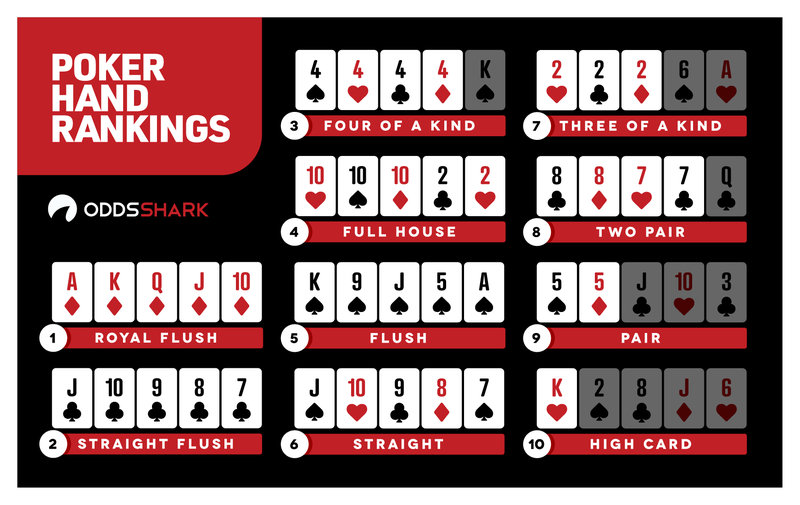

(Image source: https://www.oddsshark.com/)

Let's create a data frame of the 52 playing cards in a standard deck. It will be handy to use the pandas.Series.repeat function to build the data frame. We'll describe a card by it's color, suit and face value. 

In [27]:
# make a series containing the colors;
color = pd.Series(['black','red']).repeat(repeats=[26,26])
color

0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
0    black
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
1      red
dtype: object

In [28]:
# we renumber the index from 0 to 51
color.index = range(len(color))
color

0     black
1     black
2     black
3     black
4     black
5     black
6     black
7     black
8     black
9     black
10    black
11    black
12    black
13    black
14    black
15    black
16    black
17    black
18    black
19    black
20    black
21    black
22    black
23    black
24    black
25    black
26      red
27      red
28      red
29      red
30      red
31      red
32      red
33      red
34      red
35      red
36      red
37      red
38      red
39      red
40      red
41      red
42      red
43      red
44      red
45      red
46      red
47      red
48      red
49      red
50      red
51      red
dtype: object

In [29]:
#make a series containing the suits

suit = pd.Series(['club','spade','diamond','heart']).repeat(repeats=[13,13,13,13])
suit.index = range(len(suit))

suit

0        club
1        club
2        club
3        club
4        club
5        club
6        club
7        club
8        club
9        club
10       club
11       club
12       club
13      spade
14      spade
15      spade
16      spade
17      spade
18      spade
19      spade
20      spade
21      spade
22      spade
23      spade
24      spade
25      spade
26    diamond
27    diamond
28    diamond
29    diamond
30    diamond
31    diamond
32    diamond
33    diamond
34    diamond
35    diamond
36    diamond
37    diamond
38    diamond
39      heart
40      heart
41      heart
42      heart
43      heart
44      heart
45      heart
46      heart
47      heart
48      heart
49      heart
50      heart
51      heart
dtype: object

In [30]:
# make a series containing the face values
faces = pd.Series(['A','2','3','4','5','6','7','8','9','10','J','Q','K'])

faces

0      A
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10     J
11     Q
12     K
dtype: object

In [31]:
face = pd.concat([faces] * 4) 
face.index = range(len(face))

face

0      A
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10     J
11     Q
12     K
13     A
14     2
15     3
16     4
17     5
18     6
19     7
20     8
21     9
22    10
23     J
24     Q
25     K
26     A
27     2
28     3
29     4
30     5
31     6
32     7
33     8
34     9
35    10
36     J
37     Q
38     K
39     A
40     2
41     3
42     4
43     5
44     6
45     7
46     8
47     9
48    10
49     J
50     Q
51     K
dtype: object

In [32]:
# combine the three series into a data frame

cards = pd.DataFrame({'color':color, 'suit':suit, 'face':face})

# show the first and last 13 cards in the deck

display(cards.iloc[:13,:], cards.iloc[39:,:])

,color,suit,face
0,black,club,A
1,black,club,2
2,black,club,3
3,black,club,4
4,black,club,5
5,black,club,6
6,black,club,7
7,black,club,8
8,black,club,9
9,black,club,10


,color,suit,face
39,red,heart,A
40,red,heart,2
41,red,heart,3
42,red,heart,4
43,red,heart,5
44,red,heart,6
45,red,heart,7
46,red,heart,8
47,red,heart,9
48,red,heart,10


In [33]:
# single poker hand
cards.sample(5)

,color,suit,face
20,black,spade,8
16,black,spade,4
7,black,club,8
13,black,spade,A
18,black,spade,6


#### Let's use sampling to estimate the probability of a full house (2 cards of one face value, 3 of another)

Here's a function to test whether a given hand is a full house.

Let's first make a test case of a full house and see what it looks like when we use the .value_counts() function

In [34]:
test_case_1 = pd.DataFrame({'face': ['2','2','2','3','3'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond']})
test_case_1

,face,suit
0,2,heart
1,2,club
2,2,spade
3,3,club
4,3,diamond


In [35]:
test_case_1['face'].value_counts()

2    3
3    2
Name: face, dtype: int64

In [36]:
def isfullhouse (df, var='face'):
    if df[var].shape[0] != 5:
        return 'Not a poker hand'
    else:
        counts = df[var].value_counts()
        if counts.min() == 2 and counts.max() == 3:
            return True
        else:
            return False

Let's check it against several test cases.

In [37]:
isfullhouse(test_case_1)

True

In [38]:
test_case_2 = pd.DataFrame({'face': ['2','2','2','2','A'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond']})
test_case_2

,face,suit
0,2,heart
1,2,club
2,2,spade
3,2,club
4,A,diamond


In [39]:
isfullhouse(test_case_2)

False

In [40]:
test_case_3 = pd.DataFrame({'face': ['2','2','2','3','A', 'K'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond', 'heart']})
test_case_3

,face,suit
0,2,heart
1,2,club
2,2,spade
3,3,club
4,A,diamond
5,K,heart


In [41]:
isfullhouse(test_case_3)

'Not a poker hand'

In [42]:
## Draw poker hands at random
## Estimate probability of full house

fh_count = 0
n_iterations = 50000

for i in range(n_iterations):
    new_hand = cards.sample(5)
    fh_count += isfullhouse(new_hand)
    


In [43]:
print(fh_count)
print(50000)
print('Probability estimate based on ', n_iterations, 'iterations:', fh_count/n_iterations)

71
50000
Probability estimate based on  50000 iterations: 0.00142


### Calculating the probabilities using combinatorics

Combinatorial (counting) methods are often useful for determining the probabilities of events made up of multiple outcomes when the basic outcoems are sampled with equal probabilities. As an example, if 5 cards are dealt at random and without replacement from a 52 card deck, then all possible 5 card hands are equally likely. The probability of a given type of hand is then the ratio of the number of possible hands of that type over the total number of possible 5 card hands of any type.

Let's consider a full house, which is a compound event. The possible full houses are all possibel sets of three cards of one face value and two cards of another face value.  

We need to figure out:

+ How many possible sets of 5 cards are there? 

+ How many possible full house combinations are there?

Here is an extremely powerful general approach.

**Multiplication rule:** If an event is made up of a series of choices with $k_1$ ways to make the first choice, $k_2$ ways to make the second choice and so on, then the total number of combinations of choices is the product of the numbers of ways to make each of the individual choices (i.e., $k_1*k_2*k_3*\cdots$).

**Example 1: How many possible ordered sequences of 5 cards?** 

$$
52*51*50*49*48 = 52!/47!
$$

**Example 2: How many possible poker hands?** First notice that the number of ways to select an ordered sequence of 5 cards = number of poker hands $\times$ number of ways of reordering the five cards. Thus, using combinatorial notation,

$$
52*51*50*49*48 = 5*4*3*2*1*{{52}\choose{5}},
$$

and the number of possible poker hands is

$$
{{52}\choose{5}} = {52*51*50*49*48 \over 5*4*3*2*1} = {52! \over 5! 47!}
$$

**Example 3: How many possible full houses?** This is a bit more complicated. There are 13 choices for the face value triplet, and then 12 choices for the face value duo. There are then ${4}\choose{3}$ ways to select three of the four cards of the first face value, and ${4}\choose{2}$ ways to choose the of the 4 cards of the second face value. Putting this together, the number of possible full houses is

$$
13*12*{{4}\choose{3}}*{{4}\choose{2}} = 13*12*4*6
$$

Because each possible poker hand is equally likely, this means that the probability of a full house is

$$
{\text{# possible full houses}\over\text{# possible poker hands}} = {13*12*4*6 \over {{52}\choose{5}}}
$$

In [44]:
# Probability of full house
print('Probability of full house = ',
     13*12*4*6*5*4*3*2/(52*51*50*49*48))

Probability of full house =  0.0014405762304921968


### General expressions for the number of possible samples with and without replacement

Generalizing from the previous examples, we have several general formulas for the number of ways to draw samples and subsample. Assume $n$ and $k$ are positive integers. For sampling without replacement assume $k \le n$. For sampling with replacement this is not necessary.

+ The number of ways to select a set of $k$ items **with replacement** if we keep track of the order of selection is

$$
n^k = \underbrace{n*n*\cdots*n}_{k\text{ times}}
$$

+ The number of ways to reorder (permute) $n$ items is 

$$
n! = n*(n-1)*(n-2)*\cdots*3*2*1
$$


+ The number of ways sample $k$ **ordered* items out of $n$ **without replacement** where we keep track of the order of selection: 

$$
\underbrace{n*(n-1)*(n-2)*\cdots*(n-k+1)}_{k \text{ terms}} = {n! \over (n-k)!}
$$



+ The number of ways to sample $k$ **unordered** items **without replacement** from $n$ items:

$$
{{n}\choose{k}} = {n*(n-1)*(n-2)*\cdots*(n-k+1) \over k*(k-1)*\cdots*2*1} = {n! \over k! (n-k)!}
$$


#### Example: We toss a coin 10 times. One possible sequence of heads and tails with 6 tails is THTTTHTTHH. How many possible sequences of heads and tails are there with exactly 6 tails?

Answer: There are 10 positions available in the sequence. Choose 6 of them for the tails. The number ways to do this is

$$
{{10}\choose{6}} = {10*9*8*7*6*5 \over 6*5*4*3*2} = 210
$$

#### Example: What is the probability of getting 6 tails in 10 tosses of a fair coin?

Answer: We already know there are 210 ways to get 6 tails. All possible sequences are equally likely if we toss the coin independently. How many possible sequences of heads and tails are there? 

Each of the 10 positions in the sequence has 2 possible choices, heads or tails. Therefore, the number of possible sequences of headas and tails is

$$
2*2*2*\cdots*2 = 2^{10} = 1024.
$$

Therefore, the probability of exactly 6 tails out of 10 tosses is

$$
{{{10}\choose{6}}\over 2^{10}} = {210 \over 1024} = 0.2051
$$

In [45]:
TenChoose6=10*9*8*7*6*5/(6*5*4*3*2)
TwoTo10th=2**10
(TenChoose6, TwoTo10th, TenChoose6/TwoTo10th)

(210.0, 1024, 0.205078125)

#### Try:

Suppose we wanted to simulate coin tossing using python.  How could we do it using the pandas sample function? Contruct an apropriate data frame and show how to sample $n$ coin tosses and report the number of tails.

#### Try: 

Instead of coin tossing, suppose we roll a 6-sided die with sides number 1,2, ... ,6. 

**a)** If we roll it twice, what is the probability of "snake eyes", i.e., rolling two 1's? Hint: consider how many possible outcomes there are.


**b)** If we roll it 10 times, what is the probability of getting exactly two 1's?

#### Try:

Figure out the probability that a random poker hand is "four-of-a-kind". This is a five card hand drawn at random without replacement with four card of one face value, and one card of another face value.

---
STAT 207, Douglas Simpson, University of Illinois at Urbana-Champaign